<a href="https://colab.research.google.com/github/nepslor/teaching/blob/main/data_challenge_II/data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling with R's tidyverse
Data wrangling is the struggling set of operations needed to import, standardize and transform your data in order to extract information.  

<p align="center"> IMPORT────────► TIDIFY─────────► TRANSFORM </p>

For the sake of exposition, we will start from the **tidify** and **transform** steps, and delegate the tedious importing notions to the end of the lesson.

Tidifying data adds some workload for the data scientist; at the same time it is usually the most rewarding step: putting the data in a standardized format make it readily usable by most of the more popular R's functions.   

### The tidyverse

The [**tidyverse**](https://www.tidyverse.org/) is a set of packages that work in harmony because they share common data representations and API design. In particular, they are thought to work on tidy data, tibbles being the standard data format for tidy data.

<img align="left" src="https://raw.githubusercontent.com/nepslor/teaching/main/data_challenge_II/tidyverse.png" width="300">

For data wrangling, we will focus on the following tidyverse packages:
* [**tibble**](https://tibble.tidyverse.org/). One of the unifying features of the tidyverse, is a de-facto standard for manipulating tabular data, like pandas DataFrames in python. Partial display of results, lazy evaluation
* [**dplyr**](https://dbplyr.tidyverse.org/index.html). Functions to manipulate dataframes, tibbles and tidy data, compatible with the pipe operator `%>%` from the `magrittr` package (more on this later). Additionally, dbdplyr can directly work interfacing with data stored in databases.
* [**tidyr**](https://tidyr.tidyverse.org/). Helps you create and manipulate tidy data and tibbles
* [**readr**](https://readr.tidyverse.org/) Functions to import data into R. They are typically much faster (~10x) than their base equivalents. Long running jobs have a progress bar, so you can see what’s happening. They are more reproducible. Base R functions inherit some behaviour from your operating system and environment variables, so import code that works on your computer might not work on someone else’s.
<br />
<br />

R doesn't support functions partial import natively: it is often difficult to understand from which package commands come from. In this list we summarize the commands we will use during this lesson:  

|Package | Commands|
|:---|---:|
|dplyr| `filter` `slice` `arrange` <br /> `select` `rename` `mutate` `relocate`<br /> `group_by` `summarise` <br />`left_join` `right_join` `full_join`|
|tibble| `as_tibble` `as.data.frame` |
|tidyr| `pivot_longer` `pivot_wider` <br /> `unnest_longer` `unnest_wider`|
|readr| `read_csv` `read_delim` <br /> `unnest_longer` `unnest_wider`|

Let's start our data wrangling journey by importing the tidyverse

In [1]:
library('tidyverse')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



#📗 Tidify and transform
## Basic tibbles operations 
We will start to warm up with a recap on basic commands tibble slicing, filtering and manipulation.

In [27]:
# display the first 5 lines of a dataframe
head(iris, 3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [7]:
# take only observations with Sepal.Width bigger than 5
head(filter(iris, Sepal.Width>3),5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [24]:
# take the last 5 rows
slice(iris, (n()-5):n(), )


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6.7,3.3,5.7,2.5,virginica
2,6.7,3.0,5.2,2.3,virginica
3,6.3,2.5,5.0,1.9,virginica
4,6.5,3.0,5.2,2.0,virginica
5,6.2,3.4,5.4,2.3,virginica
6,5.9,3.0,5.1,1.8,virginica


In [26]:
# sort rows with ascending values of Petal.Length
head(arrange(iris, Petal.Length))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,4.6,3.6,1.0,0.2,setosa
2,4.3,3.0,1.1,0.1,setosa
3,5.8,4.0,1.2,0.2,setosa
4,5.0,3.2,1.2,0.2,setosa
5,4.7,3.2,1.3,0.2,setosa
6,5.4,3.9,1.3,0.4,setosa


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



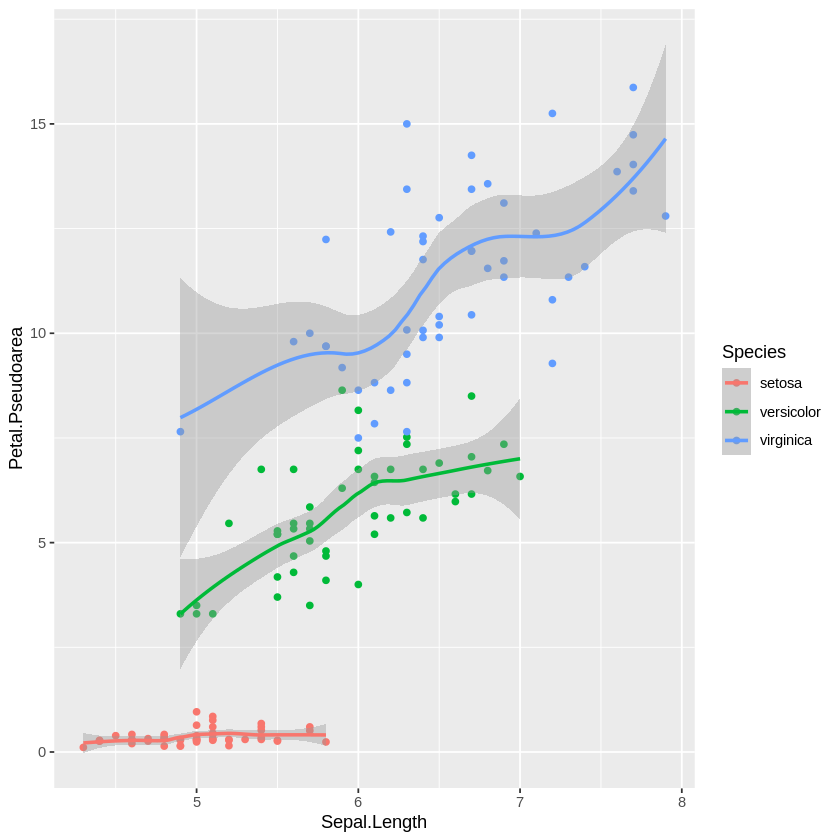

In [66]:
# create a new parameter Petal.Pseudoarea ~ Petal.Length * Petal.Width
irirs_aug <- mutate(iris, Petal.Pseudoarea = Petal.Length * Petal.Width)

# plot 
ggplot(irirs_aug,aes(x=Sepal.Length, y=Petal.Pseudoarea, color=Species)) +
 geom_point() + geom_smooth()

❓ Can you create a variable called TotalLength = Petal.Length + Sepal.Length and order the dataset based on these values, for observations with TotalLength > 10 ❓ 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



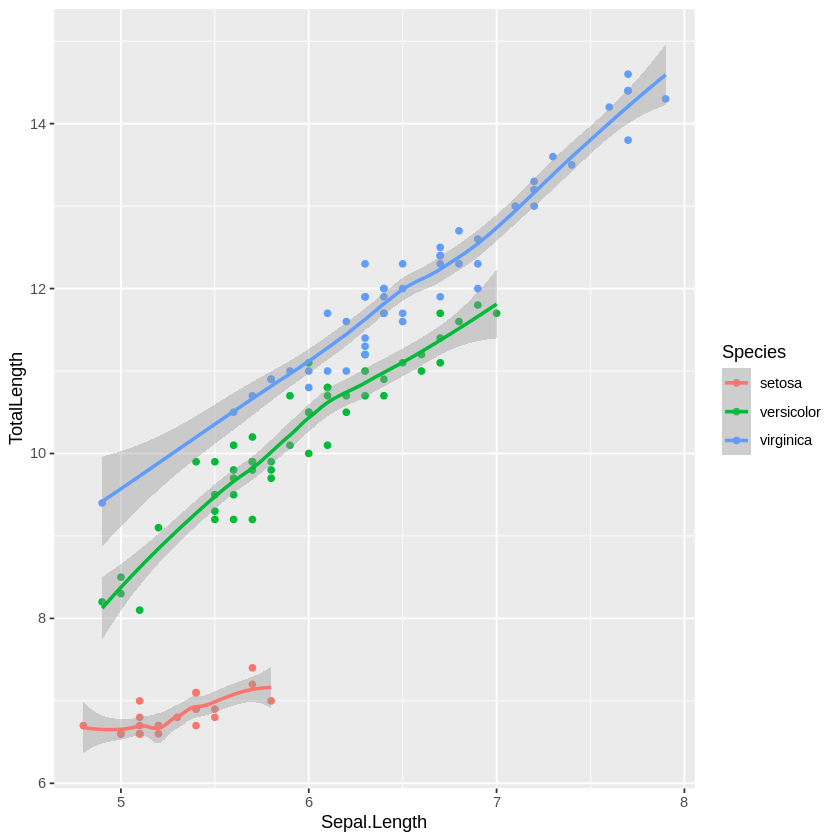

In [65]:
irirs_tl <- iris %>% 
  mutate(TotalLength = Petal.Length + Sepal.Length) %>%
  arrange(TotalLength) %>%
  filter(TotalLength>6.5)

# plot 
ggplot(irirs_tl,aes(x=Sepal.Length, y=TotalLength, color=Species)) +
 geom_point() + geom_smooth()

## Tidy data
*`"Like families, tidy datasets are all alike but every messy dataset is messy in its own way" - H. Wickham`*

Tidydatasets provide a standardized way to link the structure of a dataset (its physical layout)with its semantics (its meaning)
Making the data tidy means having it in a non-messy format. This is a rather arbitrary and subjective definition. We can shad some light on the concept of tidy data through these three requisites for our dataset to by tidy:

1. Each variable must have its own column.
2. Each observation must have its own row.
3. Each value must have its own cell.

This is still not very clear, since this can be considered true for almost any  tabular dataset (we'll see a counter example later). For instance, what we should consider a variable rather than an observation?
In the word H. Wickham, the creator of tidyr, a rule of thumb to discern between variables and values in a tabular dataset is that :

***should be easy to spot functional relation between variables (=columns), while should be way harder to spot them between observations (=rows)*** 

Let's see some examples from the original [Tidy Data paper](http://www.jstatsoft.org/v59/i10/paper). 

The `relig_income dataset` in tidyr present annual income divided by declared religion:

In [ ]:
relig_income

religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Agnostic,27,34,60,81,76,137,122,109,84,96
Atheist,12,27,37,52,35,70,73,59,74,76
Buddhist,27,21,30,34,33,58,62,39,53,54
Catholic,418,617,732,670,638,1116,949,792,633,1489
Don’t know/refused,15,14,15,11,10,35,21,17,18,116
Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
Hindu,1,9,7,9,11,34,47,48,54,37
Historically Black Prot,228,244,236,238,197,223,131,81,78,339
Jehovah's Witness,20,27,24,24,21,30,15,11,6,37


❓ How many variables there are in this dataframe, and which❓


In order to make the dataset tidy, we need to melt it. Tidyr has its own functions inspired by `melt()` from [data.table](https://github.com/Rdatatable/data.table/wiki). In particular, to melt this dataset into tidy data, we can use the `pivot_longer()` function:   

religion,income,count
<chr>,<chr>,<dbl>
Agnostic,<$10k,27
Agnostic,$10-20k,34
Agnostic,$20-30k,60
Agnostic,$30-40k,81
Agnostic,$40-50k,76
Agnostic,$50-75k,137


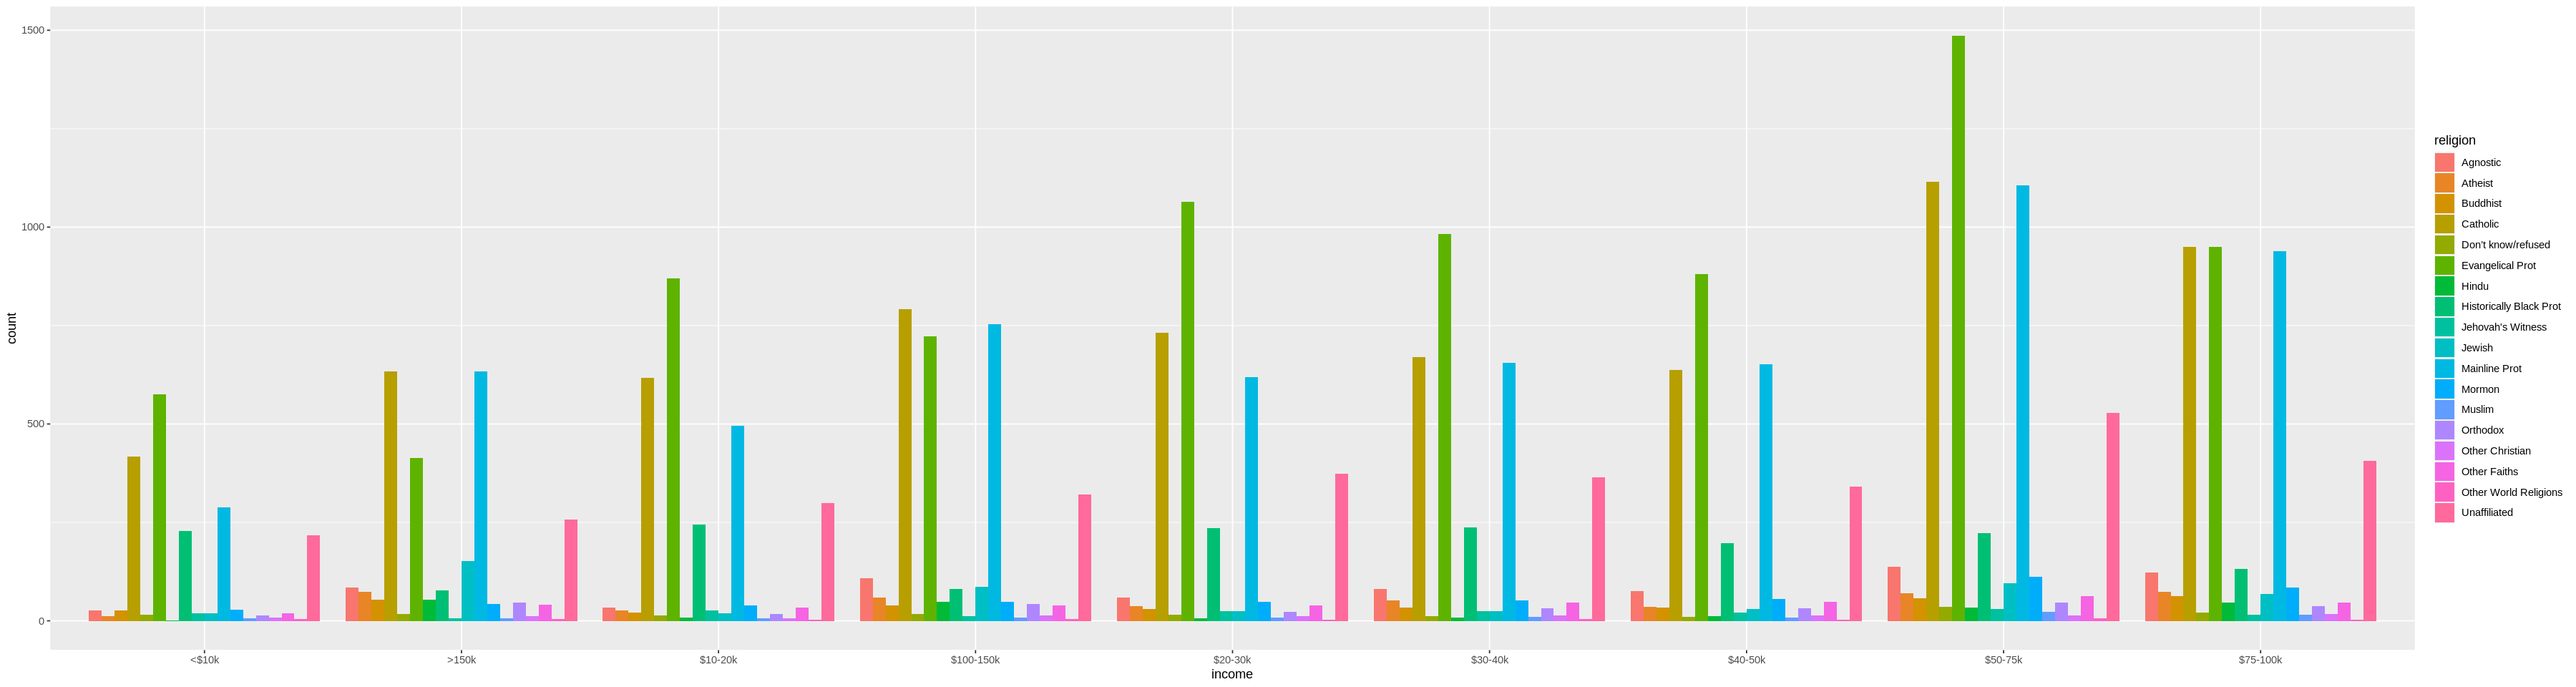

In [ ]:
# melt relig_income using columns (but the first one) as factors 
relig_long <- pivot_longer(select(relig_income, !"Don't know/refused"), !religion, names_to = "income", values_to = "count")

# ? what does the !religion do?

# see the first lines of the melted data
head(relig_long)

# now we can plot the tidy data
options(repr.plot.width = 30, repr.plot.height = 8)
ggplot(relig_long, aes(x=income, y=count, fill=religion)) + geom_bar(stat="identity",position = "dodge") 

We can spot some big spikes for the Chatolic, Evangelical and Mainline groups.

❓ Do these peaks means these groups are wealthier compare to the others❓

Let's try to answare this question by furter manipulating the data, while introducing the pipe operator `%>%`.
This operator from the `magrittr` package is the equivalent of the bash `|`. 
This make possible to elegantly concatenate functions, adding clarity to long nested function calls. For example, the code

`head(select(relig_income, religion))`

is equivalent to:

```
relig_income %>% 
  select(religion) %>%
  head()
```
back to our analysis:


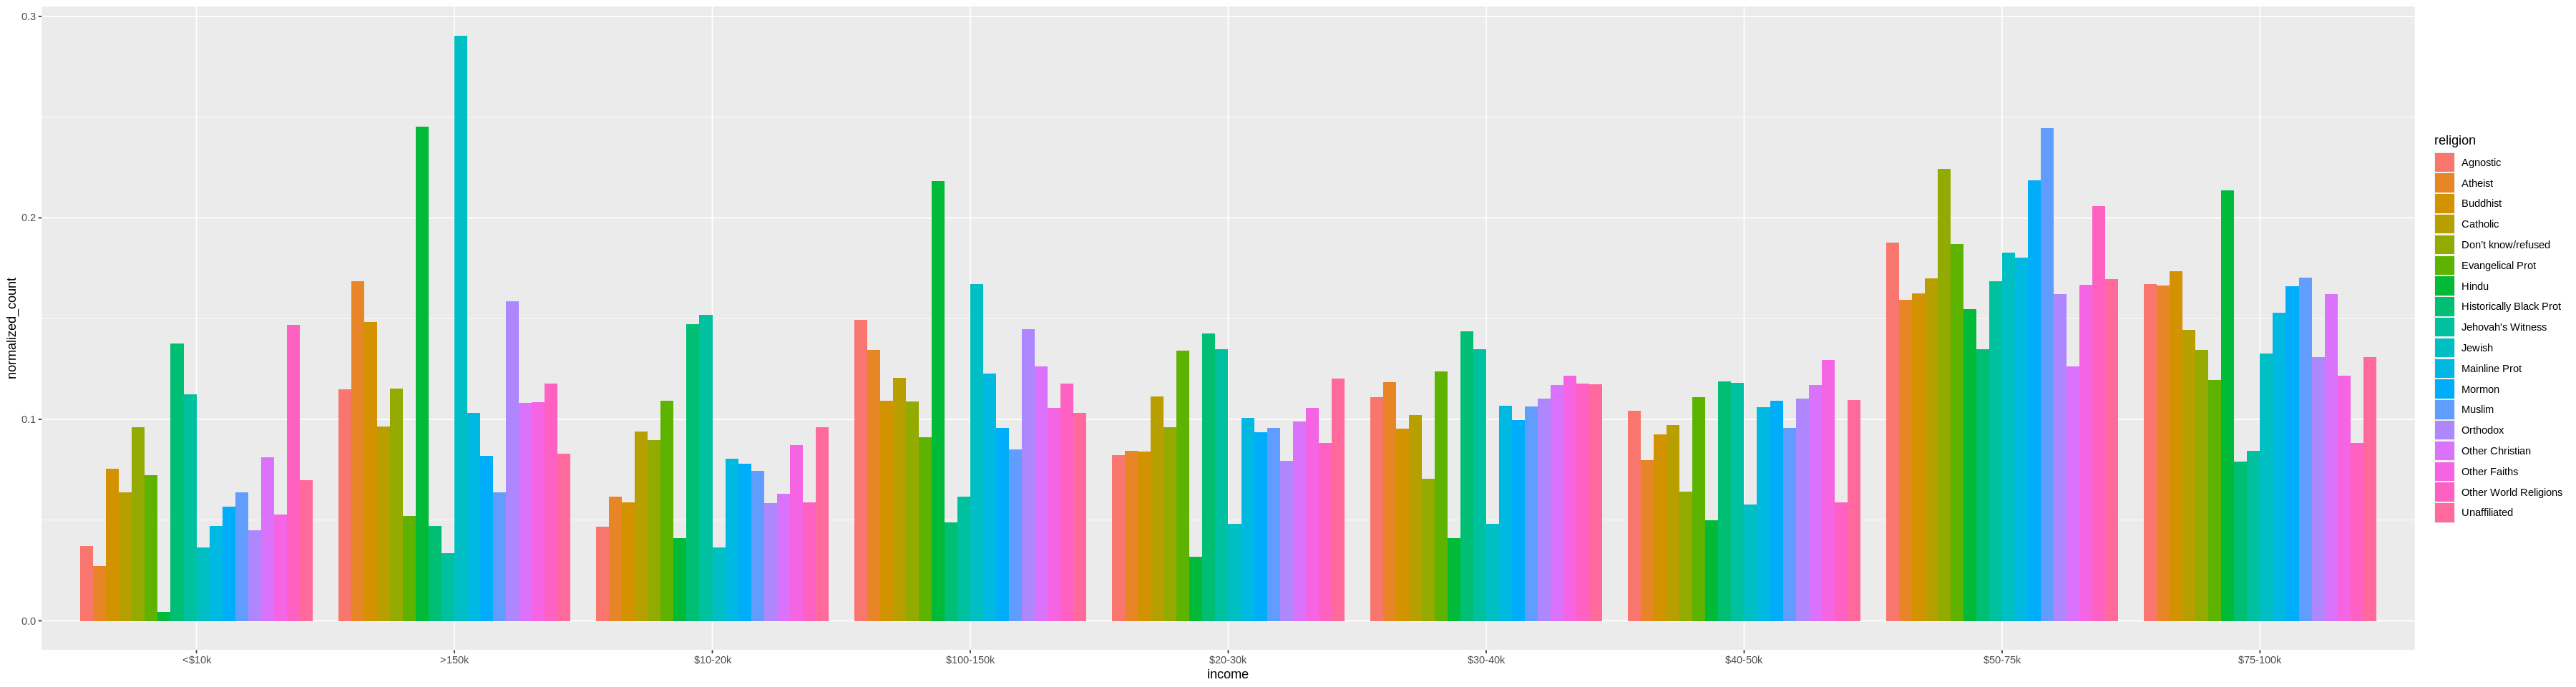

In [ ]:
# add a normalized count data column
normalized_data <- relig_long %>%   
group_by(religion) %>%                     
summarise(total_members = sum(count)) %>%
left_join(relig_long, by="religion") %>%
mutate(normalized_count=count/total_members)

# plot
options(repr.plot.width = 30, repr.plot.height = 8)
ggplot(normalized_data, aes(x=income, y=normalized_count, fill=religion)) + geom_bar(stat="identity",position = "dodge") 

The dataset we have used present severely unbalanced data, meaning some categories (in terms of religion) are under-represented. To actually see if a given religious group has a more skewed distribution w.r.t. the others we have normalized the various income classes within a given religious group with the total number of this particular religion. 

It is worth it to break the piping to better understand what we have done.

The first three lines are an example of the **split-apply-combine** paradigm implemented in the [dplyr](https://www.rdocumentation.org/packages/dplyr/versions/0.7.8) package: we firstly split the data into groups (in our case the different religious groups), we apply some functions (usually simple statistics), and we finally we merge the results from the different subgroups in a single dataframe.

<img src="https://cengel.github.io/R-data-wrangling/img/split-apply-combine.png" width="700"/>

Let's see the results of this operation

In [ ]:
# The first three line use group_by() and summarize() to get the total number of members of a given religious group
total_members <- relig_long %>% 
group_by(religion) %>%                 # virtually split the dataframe using the factors in the religion column
summarise(total_members = sum(count))  # apply the sum statistics to the count column and combine back to a single dataframe

total_members

religion,total_members
<chr>,<dbl>
Agnostic,730
Atheist,439
Buddhist,357
Catholic,6565
Don’t know/refused,156
Evangelical Prot,7943
Hindu,220
Historically Black Prot,1656
Jehovah's Witness,178


The 4th line apply a join operation to merge two dataframes: the original one and the one plotted above. Basically, we can use the `total_members` dataframe as a map, associating a `total_member` variable to each line of the `relig_long` dataframe. 

This can be done using the various join functions from `dplyr` package. The following table pretty much summarize the logic of the different functions:

|conceptual set operation|examples| 
|:---:|:---:|
| <img src="https://d33wubrfki0l68.cloudfront.net/aeab386461820b029b7e7606ccff1286f623bae1/ef0d4/diagrams/join-venn.png" width=500 >| <img src="https://d33wubrfki0l68.cloudfront.net/9c12ca9e12ed26a7c5d2aa08e36d2ac4fb593f1e/79980/diagrams/join-outer.png" width=420 >|



In [ ]:
total_members %>% left_join(relig_long, by="religion") %>% head(15)

religion,total_members,income,count
<chr>,<dbl>,<chr>,<dbl>
Agnostic,730,<$10k,27
Agnostic,730,$10-20k,34
Agnostic,730,$20-30k,60
Agnostic,730,$30-40k,81
Agnostic,730,$40-50k,76
Agnostic,730,$50-75k,137
Agnostic,730,$75-100k,122
Agnostic,730,$100-150k,109
Agnostic,730,>150k,84


As you can see now the final dataframe have a "total_member" column, with the same values for all the entries with religion==Agnostic and ==Atheist (730 and 439, respectively). 
### A little recap and more complex joins 
Now let's try to apply the commands learned so far with anothe example. We will use the `nycflights13` dataset, which consists of several dataframes, containing statistics on US flights. 

We will focus on the `flights` and `airports` datasets.
Let's have a look at these: 

In [96]:
install.packages("nycflights13")
install.packages("maps")          # we will use this to plot airport locations

library(nycflights13)
library(maps)

head(flights)
head(airports)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


faa,name,lat,lon,alt,tz,dst,tzone
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
04G,Lansdowne Airport,41.13047,-80.61958,1044,-5,A,America/New_York
06A,Moton Field Municipal Airport,32.46057,-85.68003,264,-6,A,America/Chicago
06C,Schaumburg Regional,41.98934,-88.10124,801,-6,A,America/Chicago
06N,Randall Airport,41.43191,-74.39156,523,-5,A,America/New_York
09J,Jekyll Island Airport,31.07447,-81.42778,11,-5,A,America/New_York
0A9,Elizabethton Municipal Airport,36.37122,-82.17342,1593,-5,A,America/New_York


In [70]:
mean_arrival_delay <- flights %>% 
filter(!is.na(arr_delay)) %>%
group_by(dest) %>% 
summarise(mean_delay = mean(arr_delay)) 

head(mean_arrival_delay)

airports_mean_delay <- mean_arrival_delay %>% left_join(airports, c("dest"="faa"))

head(airports_mean_delay)


dest,mean_delay
<chr>,<dbl>
ABQ,4.381890
ACK,4.852273
ALB,14.397129
ANC,-2.500000
ATL,11.300113
AUS,6.019909


dest,mean_delay,name,lat,lon,alt,tz,dst,tzone
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ABQ,4.381890,Albuquerque International Sunport,35.04022,-106.60919,5355,-7,A,America/Denver
ACK,4.852273,Nantucket Mem,41.25305,-70.06018,48,-5,A,America/New_York
ALB,14.397129,Albany Intl,42.74827,-73.80169,285,-5,A,America/New_York
ANC,-2.500000,Ted Stevens Anchorage Intl,61.17436,-149.99636,152,-9,A,America/Anchorage
ATL,11.300113,Hartsfield Jackson Atlanta Intl,33.63672,-84.42807,1026,-5,A,America/New_York
AUS,6.019909,Austin Bergstrom Intl,30.19453,-97.66989,542,-6,A,America/Chicago


Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_text).”


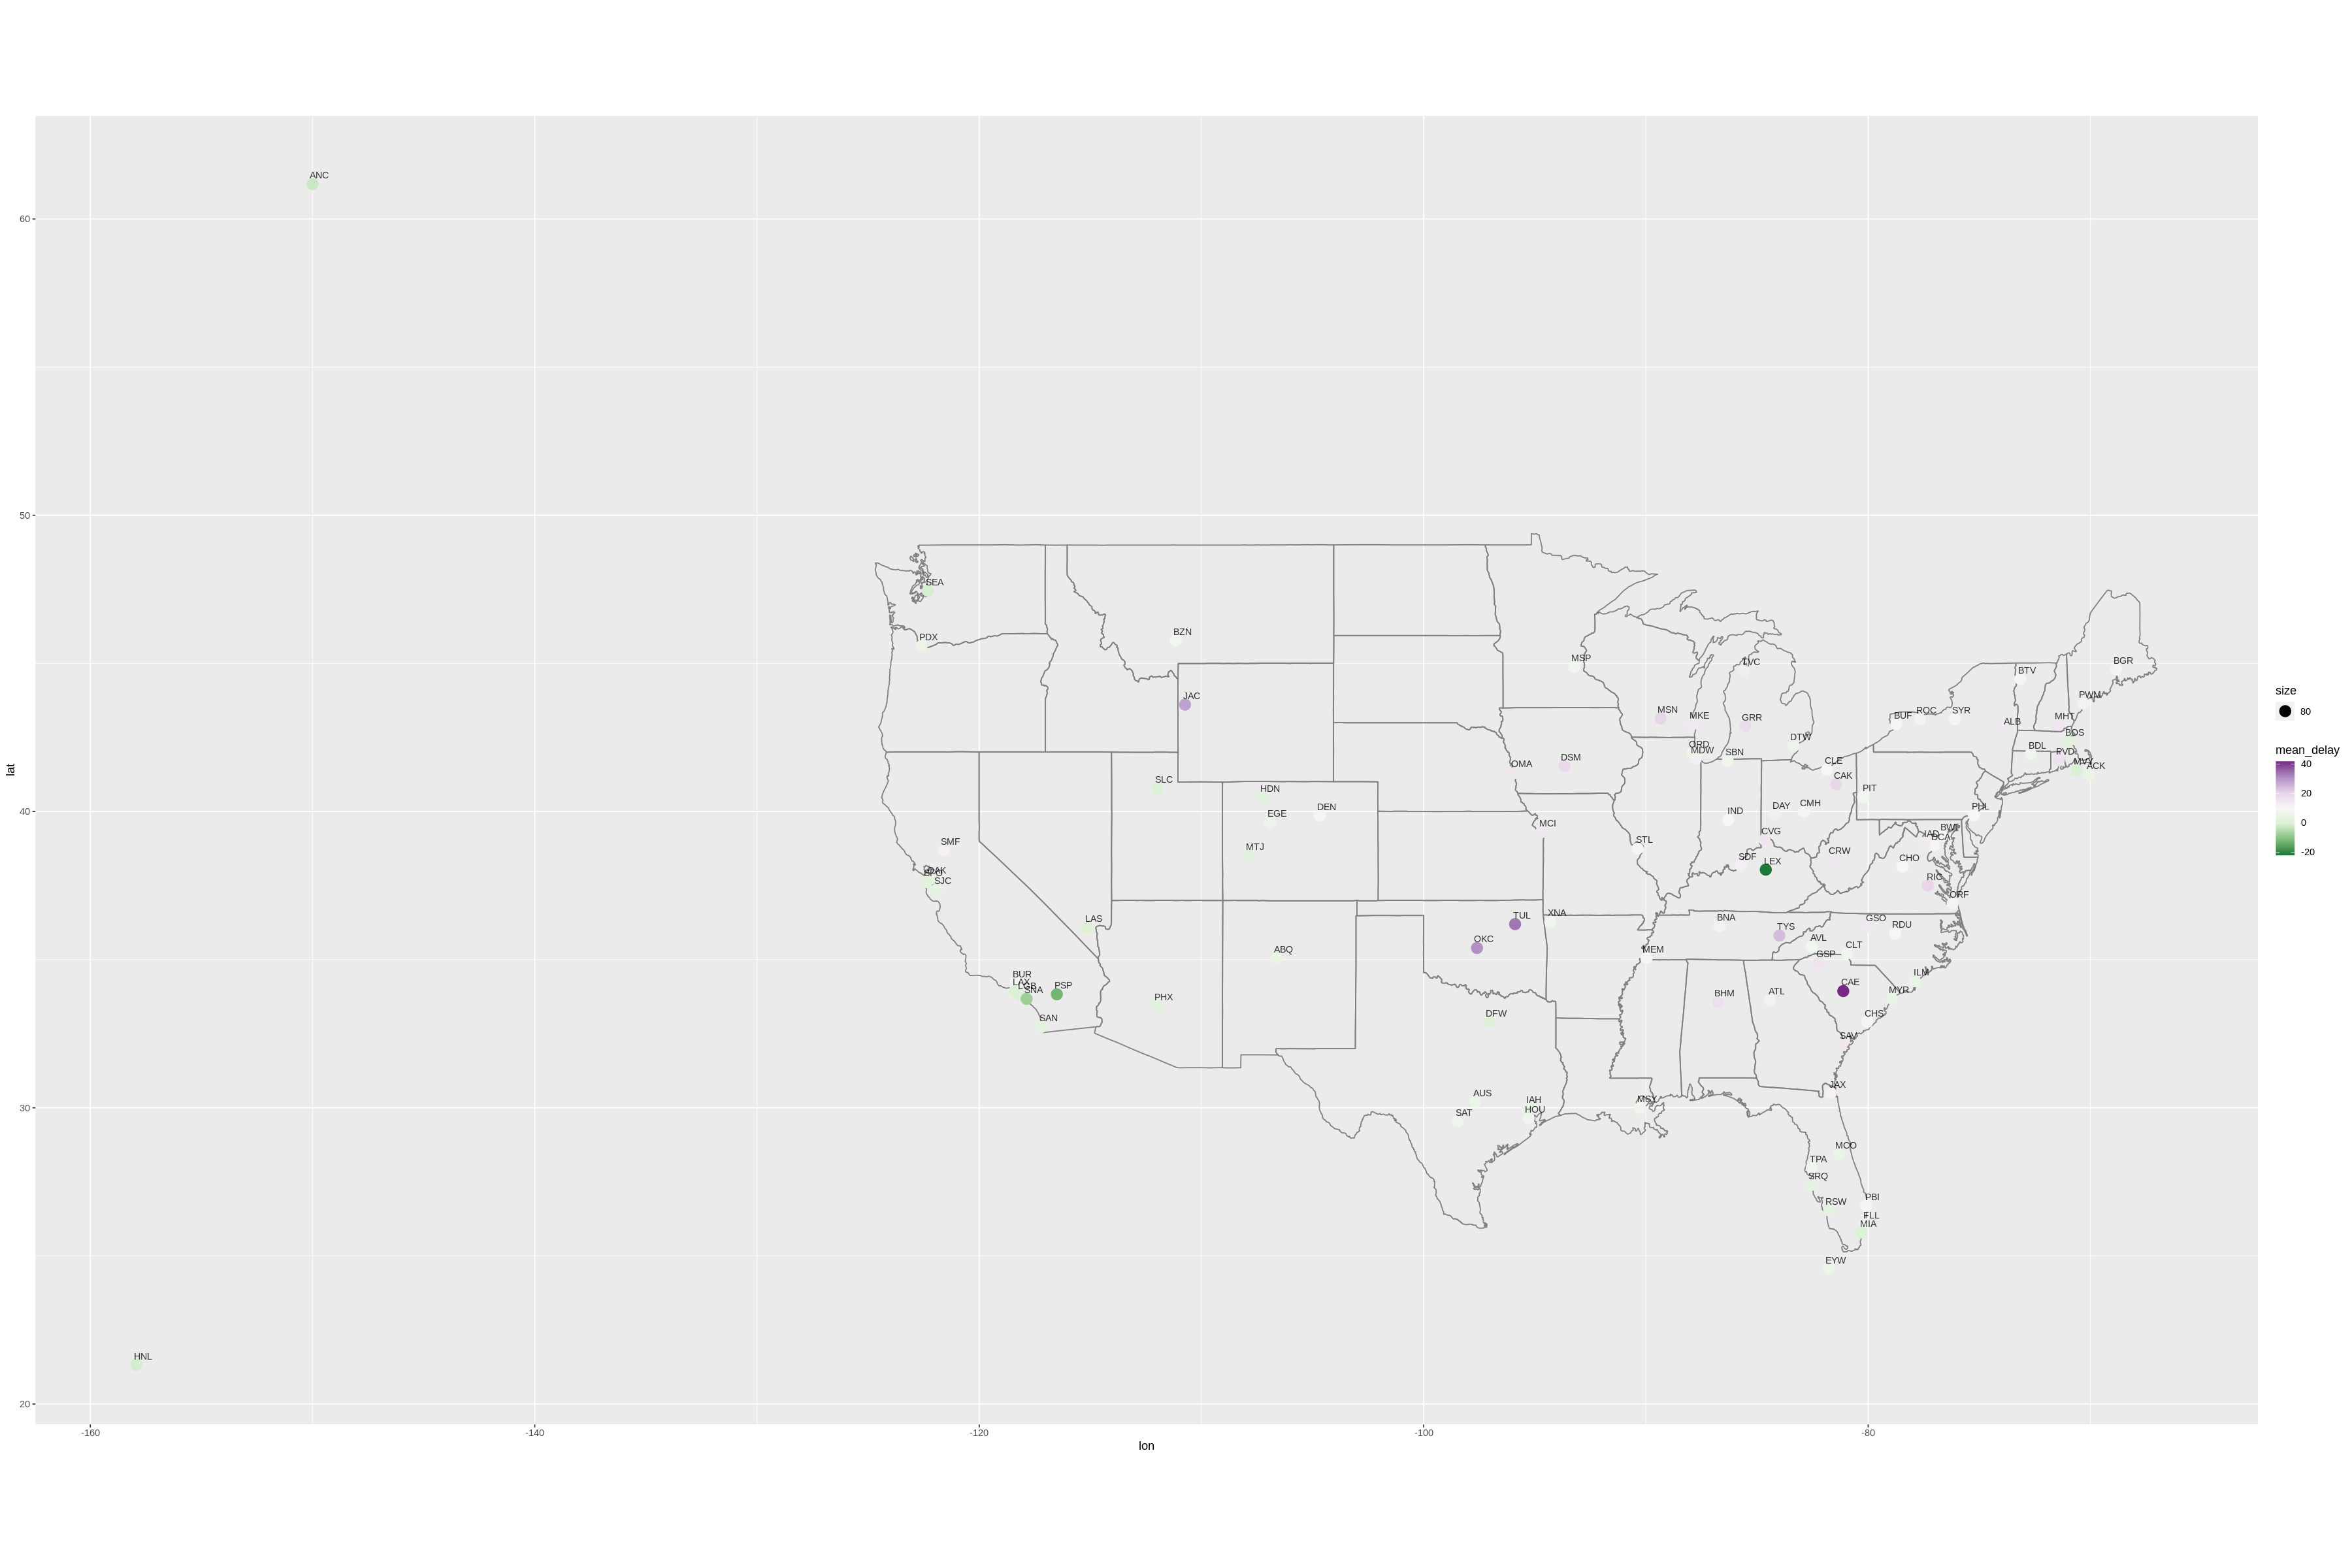

In [95]:
library(RColorBrewer)
options(repr.plot.width = 30, repr.plot.height = 20)
ggplot(airports_mean_delay, aes(lon, lat, size=80, label = dest)) +
    borders("state") +
    geom_point(aes(color=mean_delay))+ scale_color_distiller(palette = "PRGn") +
    coord_quickmap() + geom_text(size=3, alpha=0.8, nudge_x=0.3, nudge_y=0.3)

#📗 Data import


## Importing local data
We will start simple, trying to import a csv. To do so, we will start downloading a file locally, through the useful `download.file` command, which is the equivalent of the python and bash `wget` command.
To actually load the file we will use `read_csv` which is an updated and faster version of the native R `read.csv`. 

The `read_csv()` function has some advantages over `read.csv()`:
* produce tibbles
* don’t convert character vectors to factors, use row names, or munge the column names. These are common sources of frustration with the base R functions.
* are more reproducible. Base R functions inherit some behaviour from your operating system and environment variables, so import code that works on your computer might not work on someone else’s.

In [ ]:
# download from github
download.file("https://raw.githubusercontent.com/nepslor/teaching/main/data_challenge_II/student-mat.csv", "student-mat.csv")

# Import the csv 
student_mat <- read_csv("student-mat.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  `school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3` = col_character()
)


Warning message:
“15010 parsing failures.
row                                                                                                                                                                                                                                 col           expected actual              file
  1 school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3 delimiter or quote      ; 'student-mat.csv'
  1 school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;r

seems like we already did something wrong! Can you guess what went wrong? We can try to follow the suggestion from the warning message to understand what happened. The `problems()` command accept as input an instance of a wrongly loaded csv file. Let's see what happened 

In [ ]:
problems(student_mat)

It seems like read_csv found a wrong delimiter. We can use the more general function `read_delimiter` which will let us specify the delimiter. 

In [ ]:
student_mat = read_delim("student-mat.csv", delim = ';')
head(student_mat)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)
ℹ Use `spec()` for the full column specifications.




school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [ ]:
# download from github
download.file("https://raw.githubusercontent.com/nepslor/teaching/main/data_challenge_II/student-mat.csv", "student-mat.csv")

# Import the csv 
student_mat <- read_csv("student-mat.csv")

This time the csv was correctly loaded in memory, and the types of columns have been correctly assigned. `read_delim` automatically impute the type of the columns reading the first 1000 rows of the input. 

Equivalently, we could have used `read_csv2` , which uses ";" for the field separator and "," for the decimal point.

Reading of xlsx can be done in a similar fashion:

###📙 *Big tabular datasets* 
If we are dealing with a very large csv (more than 1 GB), it is better to use [`data.table`](https://www.rdocumentation.org/packages/data.table/versions/1.14.0) and the data.table::fread() function; even if its not as much integrated in the tidyverse as the readr functions, can be 2x faster in loading data thanks to its low-level parallelism.


## Importing from SQLs
`dbplyr` is designed to work with database tables as if they were local data frames. 
Five commonly used backends are:

* RMySQL connects to MySQL and MariaDB

* RPostgreSQL connects to Postgres and Redshift.

* RSQLite embeds a SQLite database.

* odbc connects to many commercial databases via the open database connectivity protocol.

* bigrquery connects to Google’s BigQuery.

We will see just one example using RMySQL, the arguments of the function calls can slightly changing with the backend, but are otherwise similar.


In [ ]:
install.packages('RMySQL')
library('RMySQL')
con <- DBI::dbConnect(RMySQL::MySQL(), 
                 dbname = "tweater", 
                 host = "courses.csrrinzqubik.us-east-1.rds.amazonaws.com", 
                 port = 3306,
                 user = "student",
                 password = "datacamp")

# Get table names
table_names <- dbListTables(con)
print("tables in the DB:")
print(table_names)

# Import all tables
tables <- lapply(table_names, dbReadTable, conn = con)

# Print out tables
tables

[1] "tables in the DB:"
[1] "comments" "tweats"   "users"   


id,tweat_id,user_id,message
<dbl>,<dbl>,<dbl>,<chr>
1022,87,7,nice!
1000,77,7,great!
1011,49,5,love it
1012,87,1,awesome! thanks!
1010,88,6,yuck!
1026,77,4,not my thing!
1004,49,1,this is fabulous!
1030,75,6,so easy!
1025,88,2,oh yes


In [ ]:
# select tweat_id from the first table, filtering on user_id
elisabeth_tweets <- dbGetQuery(con, "select tweat_id from comments where user_id =  1")
elisabeth_tweets

# select the message of tweat_id 77 after having merged the tweats and comments tables
sql <- "SELECT post, message
        FROM tweats INNER JOIN comments on tweats.id = tweat_id
        WHERE tweat_id = 77"
df <- dbGetQuery(con, sql)
df


tweat_id
<dbl>
87
49
77
77


post,message
<chr>,<chr>
2 slices of bread. add cheese. grill. heaven.,great!
2 slices of bread. add cheese. grill. heaven.,not my thing!
2 slices of bread. add cheese. grill. heaven.,couldn't be better
2 slices of bread. add cheese. grill. heaven.,saved my day


[1] TRUE

## Import from the web
Importing csv from an amazon webserver is as easy as loading a local csv

In [ ]:
url_csv <- "http://s3.amazonaws.com/assets.datacamp.com/production/course_1478/datasets/swimming_pools.csv"
download.file(url_csv, "swimmingpools")
read_csv("swimmingpools") %>% head()


── Column specification ────────────────────────────────────────────────────────
cols(
  Name = col_character(),
  Address = col_character(),
  Latitude = col_double(),
  Longitude = col_double()
)




Name,Address,Latitude,Longitude
<chr>,<chr>,<dbl>,<dbl>
Acacia Ridge Leisure Centre,"1391 Beaudesert Road, Acacia Ridge",-27.58616,153.0264
Bellbowrie Pool,"Sugarwood Street, Bellbowrie",-27.56547,152.8911
Carole Park,Cnr Boundary Road and Waterford Road Wacol,-27.60744,152.9315
Centenary Pool (inner City),"400 Gregory Terrace, Spring Hill",-27.45537,153.0251
Chermside Pool,"375 Hamilton Road, Chermside",-27.38583,153.0351
Colmslie Pool (Morningside),"400 Lytton Road, Morningside",-27.45516,153.0789


We can load the file in RAM without actually downloading it on our local machine, by directly using `read_csv()`, as shown in the following:

In [ ]:
pools <- read_csv(url_csv)
head(pools)

In [98]:
url_rdata <- "https://s3.amazonaws.com/assets.datacamp.com/production/course_1478/datasets/wine.RData"
# Download the wine file to your working directory
download.file(url_rdata, "wine_local.RData")

# Load the wine data into your workspace using load()
load("wine_local.RData")

# Print head of the wine data
head(wine)

Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Proline
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,3.40,1050
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,3.17,1185
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,3.45,1480
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,2.93,735
14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,2.85,1450
14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,3.58,1290


#📗 Wrap up
We will summarize some of the concepts we've introduced in this lesson going through a concrete example of data wrangling. In the following we:
* import a set of power measurements stored on the [zenodo](https://zenodo.org) platform as a pickle file.   
* filter the data to get tidy data
* detrend time series with the daily average energy



In [110]:
install.packages(c("reticulate", "box"))
box::use(reticulate)
pd <- reticulate::import("pandas")
pickle_data <- pd$read_pickle("https://zenodo.org/record/4549296/files/reduced_dataset.pk?download=1")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [111]:
# we add a time column in POSIXct format and two additional columns with the 
# hour of the day and day of the week
data <- pickle_data %>%
  mutate(date = as.POSIXct(row.names(pickle_data))) %>%
  mutate(hour = lubridate::hour(date), weekday = weekdays(as.Date(date))) %>%
  mutate(day = as.factor(lubridate::as_date(top_power_data$date, tz=NULL))) %>%
  as_tibble()

# visualize first rows
head(data, 2)

0307a3cec15787560b7d0ba094f74d1decb2fa72,0f415416ff153479d65f54df3fa9974af46e3a89,1caab5f0e80231e1c6fdefc00edec4fdb6a02c5f,27fbb11689277a30f5db9c71b42e1d3826bd34ff,2ce3e7e1a5365dc54c7f4fc6284f0052397702b9,2d837275047e5fdce39fda42b541dbf6c858a4d1,350c6b9720ebb1e1a04e8f88ad0fa114c2af77b3,39f06481738604cb5916dce15639e380514b99ca,432650b919537d23cb4054fdb85a07eecaa4524c,49228b90116c6075fabcd8a1cf0e48e016373614,⋯,S11,S12,S21,S22,ghi_backwards,temperature,date,hour,weekday,day
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<list>,<list>,<dttm>,<int>,<chr>,<fct>
9.786,20.51800,10.653333,19.19033,23.08833,41.71200,24.27800,12.34933,28.30033,11.30700,⋯,124.948,121.3660,167.8907,167.5530,"0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 1.0361273, 38.7799426, 156.4478764, 260.3510930, 344.1319121, 369.9701816, 346.8377059, 269.6279889, 128.3241184, 33.4936888, 0.4536259, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000","3.628846, 3.589157, 3.487837, 3.405724, 3.104913, 2.635390, 2.412121, 2.790470, 3.643543, 4.491212, 5.136085, 5.713502, 6.041380, 6.040144, 5.295770, 4.332725, 3.355077, 2.628606, 1.918602, 1.667037, 1.871196, 1.628147, 1.274511, 1.079066",2018-01-13 00:10:00,0,Saturday,2018-01-13
11.190,20.08633,9.367333,19.79400,22.37467,43.57267,23.85333,10.23067,30.27533,13.22533,⋯,126.385,123.8003,165.3543,165.3567,"0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 3.9360518, 55.2217493, 174.3463188, 278.0515715, 352.2518698, 368.1014701, 338.3484025, 247.0980369, 108.1575678, 23.6046182, 0.2917522, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000","3.625641, 3.573337, 3.477822, 3.371051, 3.025677, 2.567965, 2.445455, 2.910311, 3.793443, 4.605749, 5.243122, 5.799428, 6.051145, 5.960238, 5.148290, 4.157464, 3.230352, 2.488140, 1.838255, 1.709630, 1.847381, 1.563547, 1.246252, 1.013848",2018-01-13 00:20:00,0,Saturday,2018-01-13


❓ Is this data tidy, and if not, how could we make it tidy❓ 


date,hour,weekday,day,all
<dttm>,<fct>,<chr>,<fct>,<dbl>
2018-01-13 00:10:00,0,Saturday,2018-01-13,581.7577
2018-01-13 00:20:00,0,Saturday,2018-01-13,580.8963
2018-01-13 00:30:00,0,Saturday,2018-01-13,579.9497
2018-01-13 00:40:00,0,Saturday,2018-01-13,569.8367
2018-01-13 00:50:00,0,Saturday,2018-01-13,552.7877
2018-01-13 01:00:00,1,Saturday,2018-01-13,551.4447


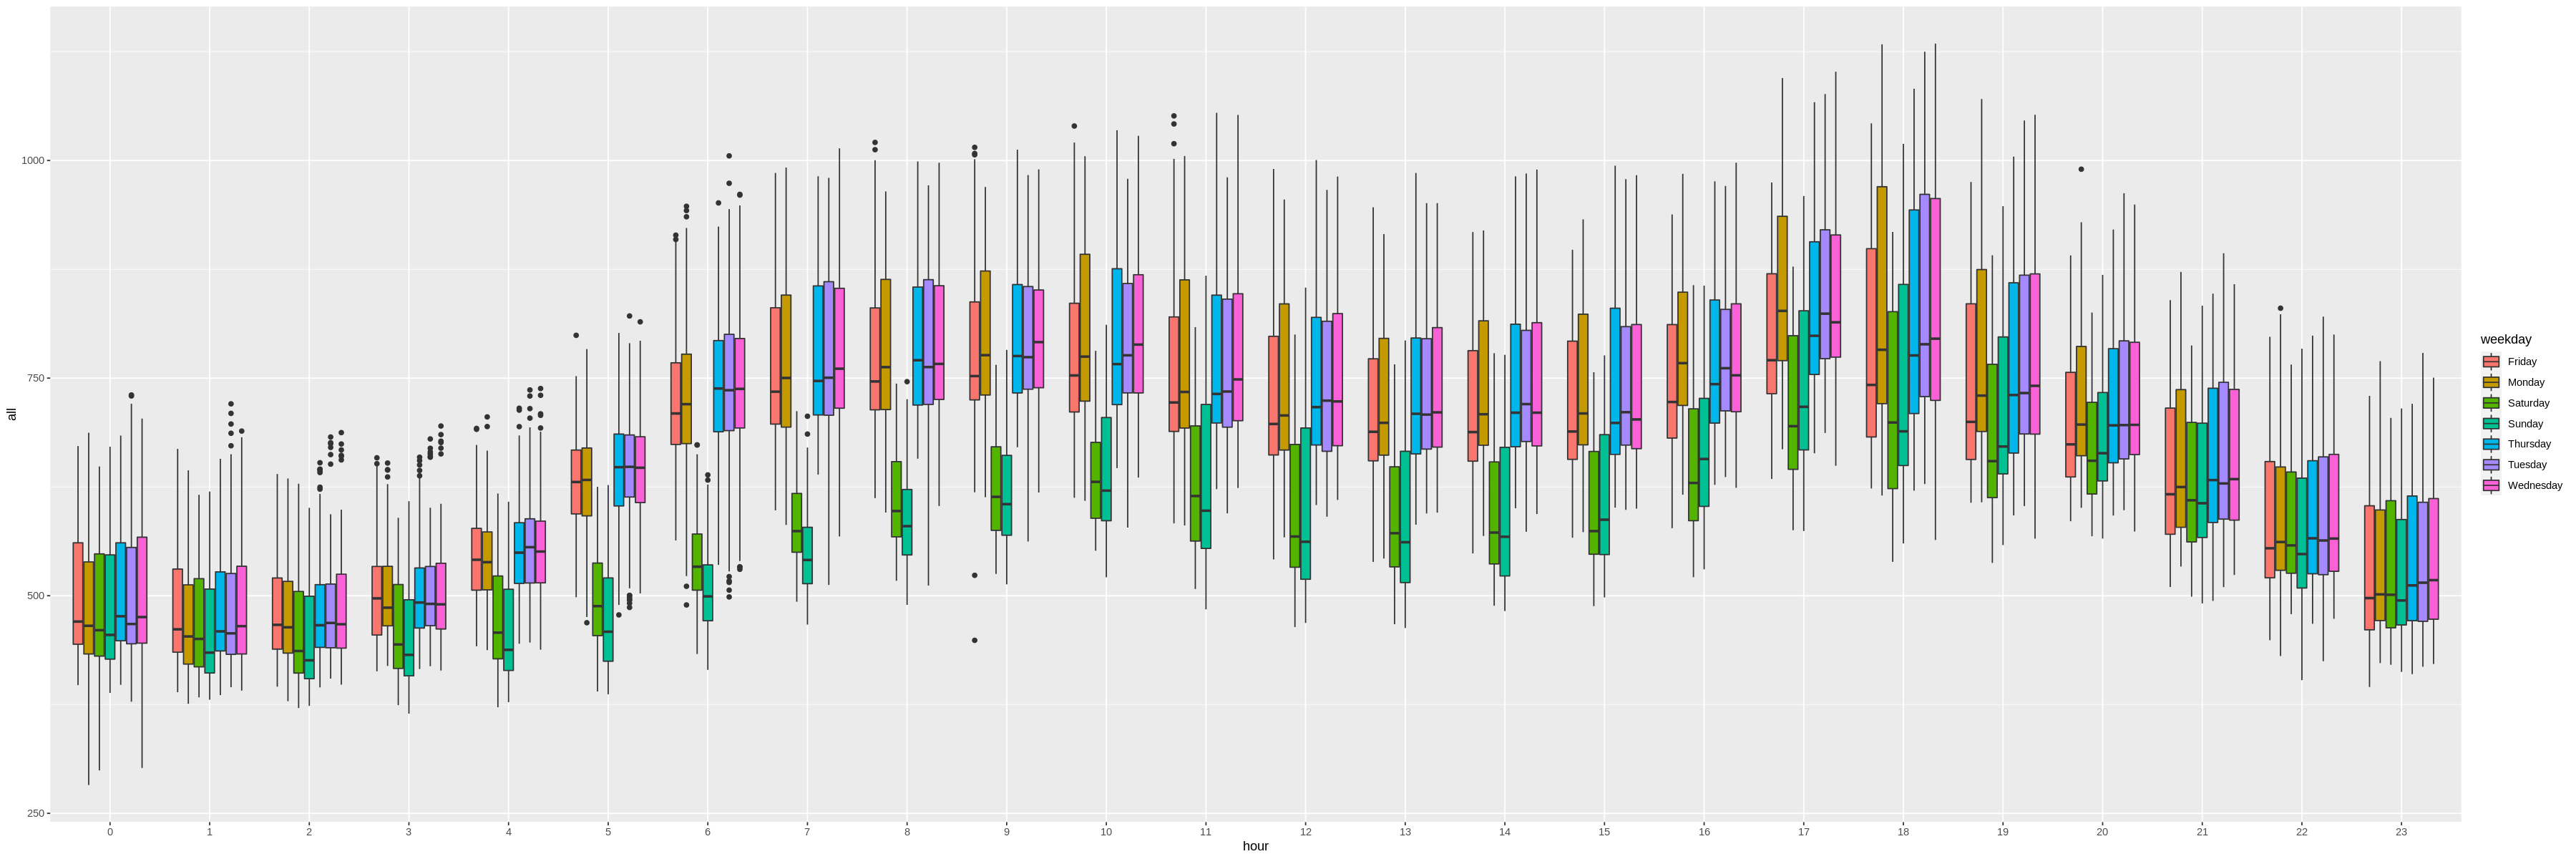

In [120]:
# we select a tidy subportion of the data
top_power_data <- data %>% 
                  select(date, hour, weekday, day, all)

# convert hour to a categorical variable so that can be used by ggplot
top_power_data$hour <- as.factor(top_power_data$hour)             

head(top_power_data)

# plot the hourly distributions of the power, divided by weekday
options(repr.plot.width = 30, repr.plot.height = 10)
ggplot(top_power_data, aes(hour, all)) +
geom_boxplot(aes(fill=weekday))

day,mean_daily
<fct>,<dbl>
2018-01-13,649.1093
2018-01-14,672.8295
2018-01-15,795.9828
2018-01-16,783.0516
2018-01-17,793.1851
2018-01-18,808.7861


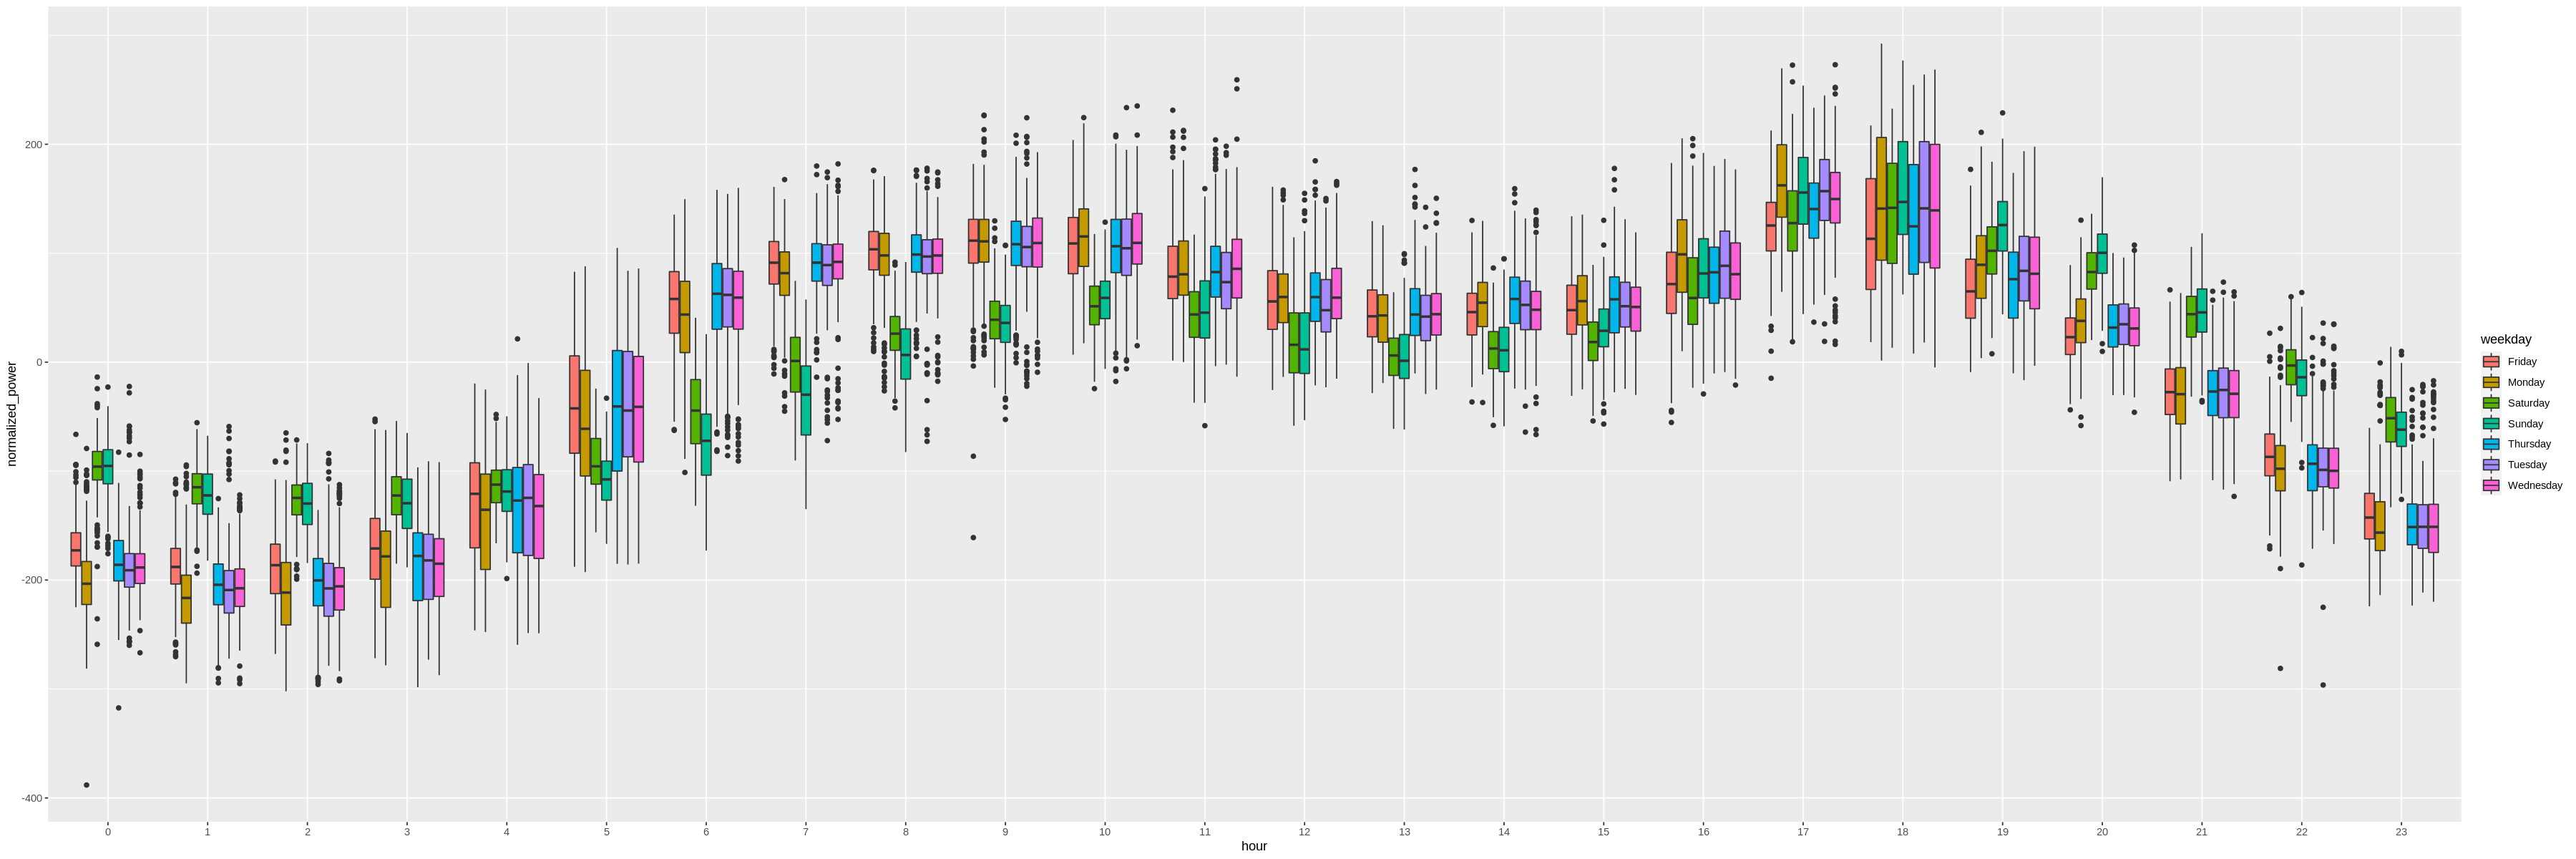

In [130]:
# we get the daily means of the power
daily_power <- top_power_data %>%
               group_by(day) %>%
               summarise(mean_daily=mean(all, na.rm = TRUE))

head(daily_power) 

# we use daily_power as a mapping through the day variable to augment 
# top_power_data. Finally we add a detrended power column

top_power_data_norm <- top_power_data %>%
                       left_join(daily_power, by="day") %>%
                       mutate(normalized_power = all-mean_daily)

options(repr.plot.width = 30, repr.plot.height = 10)
ggplot(top_power_data_norm, aes(hour, normalized_power)) +
geom_boxplot(aes(fill=weekday))

# ⛏️ Data wrangling mini-challenge
Netatmo weather stations are pretty uniformly present across Europe. The data have already been collected for you through queries to the [weathermap](https://weathermap.netatmo.com/) portal, and has been stored in an [InflufDB](https://www.influxdata.com/) database.

<img src="https://raw.githubusercontent.com/nepslor/teaching/main/data_challenge_II/netatmos.png" width=1000>

These weather stations measure temperature and pressure, and they constitute a *low quality sensor network*. This menas that the measurements are not well calibrated and full of missing data.

**SCOPE**: 
* retrieve netatmo informations from the InfluxDB instance they are store into. InfluxDB is a time-series tailored database, the query syntax is very similar to SQL. An example of InfluxDB connection setup and query using the `influxdbr` package, in which the signal *AirTemp_Av* is queried for a given date range, is shown below. In this case, the host and password fields are placeholders; the exact parameters will be given to you. 
  
* perform data imputation on missing values: try to reconstruct the most probable values of missing values at a given point in time, **using the values of the non-missing neighbours of a given netatmo station**. You can use different techniques, like kNN handling missing values, random forests trained with surrogate splits, or graph-based methods (minimizing the [Laplacian quadratic form](https://www.mdpi.com/1996-1073/13/21/5763) or using graph-DNN).   





In [ ]:
install.packages("influxdbr")
library(influxdbr)

# setting up the connection
con <- influx_connection(host='my_host',          # THIS must be changed with info I'll provide you 
                         port=443, 
                         user = 'vault_rw',
                         pass = 'my_password',    # THIS must be changed with info I'll provide you
                         scheme = "https")

# retrieving mean values of the AirTemp_Avg signal
result <- influx_select(con = con, 
                        db = "vault", 
                        field_keys = "mean(AirTemp_Avg)", 
                        measurement = "lic_meteo",
                        where = "time>= \'2021-01-01\' AND time < \'2021-01-10 00:00:00\'",
                        group_by = "time(15m)",
                        limit = 1000, 
                        order_desc = TRUE, 
                        return_xts = FALSE)

# plotting some results
ggplot(result[[1]], mapping=aes(x=time, y=mean))+ geom_point(alpha=0.4) + geom_line()